### Kmeans with simulated data
We simulated a data having truly two clusters. Afterwards we will run kmeans algorithm to find the clusters.
We will generate total of 50 data points and the mean of first 25 observations will have a mean shift with respect to the next half of the data points.

In [1]:
# necessary imports
import numpy as np

In [2]:
np.random.seed(0)

In [4]:
X = np.random.standard_normal((50, 2))
X

array([[ 1.8831507 , -1.34775906],
       [-1.270485  ,  0.96939671],
       [-1.17312341,  1.94362119],
       [-0.41361898, -0.74745481],
       [ 1.92294203,  1.48051479],
       [ 1.86755896,  0.90604466],
       [-0.86122569,  1.91006495],
       [-0.26800337,  0.8024564 ],
       [ 0.94725197, -0.15501009],
       [ 0.61407937,  0.92220667],
       [ 0.37642553, -1.09940079],
       [ 0.29823817,  1.3263859 ],
       [-0.69456786, -0.14963454],
       [-0.43515355,  1.84926373],
       [ 0.67229476,  0.40746184],
       [-0.76991607,  0.53924919],
       [-0.67433266,  0.03183056],
       [-0.63584608,  0.67643329],
       [ 0.57659082, -0.20829876],
       [ 0.39600671, -1.09306151],
       [-1.49125759,  0.4393917 ],
       [ 0.1666735 ,  0.63503144],
       [ 2.38314477,  0.94447949],
       [-0.91282223,  1.11701629],
       [-1.31590741, -0.4615846 ],
       [-0.06824161,  1.71334272],
       [-0.74475482, -0.82643854],
       [-0.09845252, -0.66347829],
       [ 1.12663592,

In [5]:
# making the shift to the means of the first 25 observations and the remaining observations
X[:25, 0] = X[:25, 0] + 3

In [6]:
X[:25, 1] = X[:25, 1] + 4

In [7]:
X

array([[ 4.8831507 ,  2.65224094],
       [ 1.729515  ,  4.96939671],
       [ 1.82687659,  5.94362119],
       [ 2.58638102,  3.25254519],
       [ 4.92294203,  5.48051479],
       [ 4.86755896,  4.90604466],
       [ 2.13877431,  5.91006495],
       [ 2.73199663,  4.8024564 ],
       [ 3.94725197,  3.84498991],
       [ 3.61407937,  4.92220667],
       [ 3.37642553,  2.90059921],
       [ 3.29823817,  5.3263859 ],
       [ 2.30543214,  3.85036546],
       [ 2.56484645,  5.84926373],
       [ 3.67229476,  4.40746184],
       [ 2.23008393,  4.53924919],
       [ 2.32566734,  4.03183056],
       [ 2.36415392,  4.67643329],
       [ 3.57659082,  3.79170124],
       [ 3.39600671,  2.90693849],
       [ 1.50874241,  4.4393917 ],
       [ 3.1666735 ,  4.63503144],
       [ 5.38314477,  4.94447949],
       [ 2.08717777,  5.11701629],
       [ 1.68409259,  3.5384154 ],
       [-0.06824161,  1.71334272],
       [-0.74475482, -0.82643854],
       [-0.09845252, -0.66347829],
       [ 1.12663592,

### Performing Kmeans with k=2

In [12]:
from sklearn.cluster import KMeans

In [15]:
# for the purpose of reproducibility we take random_state param
kmeans = KMeans(n_clusters=2,
               random_state=2,
               n_init=20).fit(X)

In [18]:
# the cluster assignments are accessible through labels_ 
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

Text(0.5, 1.0, 'K-Means Clustering Results with K=2')

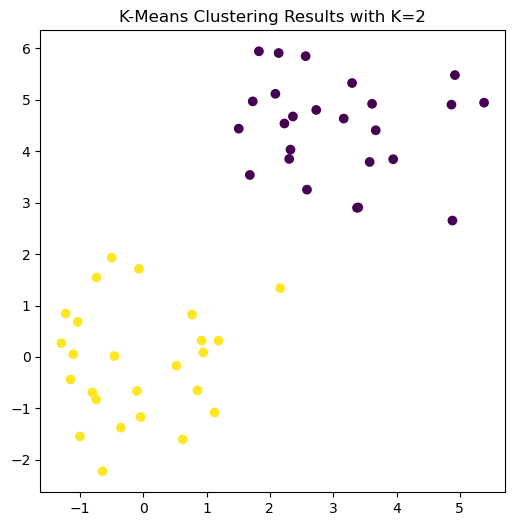

In [23]:
import matplotlib.pyplot as plt


fig , ax = plt.subplots (1, 1, figsize =(6 ,6))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2")

#### Few words about the above clustering
We have generated the data such that there are two clusters, additionally the observations are two-dimensional.
Thus we achieved the above plot easily. In case there were more than two dimensions we would have considered performing PCA.

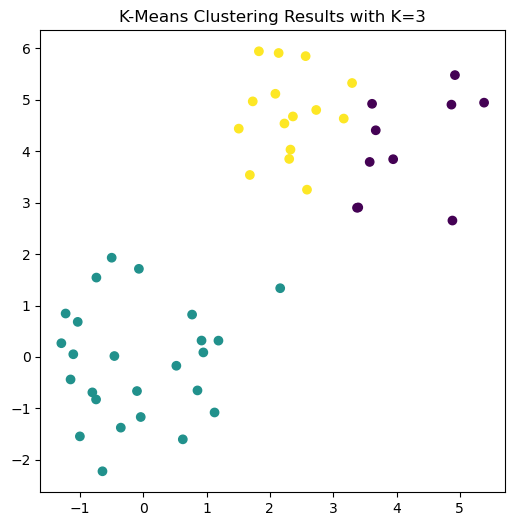

In [25]:
# Running kmeans again but this time with 3 clusters
kmeans = KMeans(n_clusters =3,
                random_state =3,
                n_init =20).fit(X)


fig , ax = plt.subplots(figsize =(6 ,6))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");

### Performing kmeans with k=3
Most of the time in real world data, we do not know the real number of clusters. Such as above, assuming we did not know the real value for k, we could have reached to a conclusion of k=3.

Through n_init argument set as 20 kmeans algorithm runs with 20 initial cluster assignments and then Kmeans() fuunction will report the best result.

In [26]:
kmeans1 = KMeans(n_clusters =3,
                random_state =3,
                n_init =1).fit(X)


kmeans20 = KMeans(n_clusters =3,
                  random_state =3,
                n_init =20).fit(X);

kmeans1.inertia_ , kmeans20.inertia_

(83.99564111734921, 78.51465146573562)

Through inertia_ we get the total within-cluster sum of squares. The objective is to minimize that, thus in setting n_init as 20 we get a smaller within_cluster sum of squares and it is recommended to run K-Means clustering with a higher value of n_init such as 20 or above. 